In [1]:
import pandas as pd
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("Iris.csv")

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [8]:
df.info

<bound method DataFrame.info of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-seto

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [10]:
df.shape

(150, 6)

In [11]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


In [13]:
df.isna().apply(pd.value_counts).T

,False
Id,150
SepalLengthCm,150
SepalWidthCm,150
PetalLengthCm,150
PetalWidthCm,150
Species,150


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [15]:
from sklearn.preprocessing import LabelEncoder
Le=LabelEncoder()
df['Species']=Le.fit_transform(df['Species'])

In [16]:
df['Species'].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

In [17]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [18]:
X=df.drop(['Id','Species'],axis=1)

In [19]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [20]:
y=df[['Species']]

In [21]:
y.head()

,Species
0,0
1,0
2,0
3,0
4,0


In [22]:
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [23]:
X_train.shape

(120, 4)

In [24]:
X_test.shape

(30, 4)

In [25]:
y_train.shape

(120, 1)

In [26]:
y_test.shape

(30, 1)

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [28]:
#import the pipeline
from sklearn.pipeline import Pipeline

In [29]:
#Create the pipeline
#n_components=2 here 2 means hyper parameters 
pipe = Pipeline([('scaler',StandardScaler()),('PCA',PCA(n_components=2)),('rf',RandomForestClassifier(criterion='entropy',max_depth=4))])

In [30]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('PCA', PCA(n_components=2)),
                ('rf',
                 RandomForestClassifier(criterion='entropy', max_depth=4))])

In [32]:
pipe_pred=pipe.predict(X_test)

In [33]:
pipe_pred

array([0, 1, 2, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2])

In [34]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [35]:
accuracy_score(y_test,pipe_pred)*100

93.33333333333333

In [36]:
pipe.score(X_train,y_train)*100

96.66666666666667

In [37]:
#Underfitting - When the test accuracy is higher than the train accuracy the model is underfitting

In [39]:
cf=confusion_matrix(y_test,pipe_pred)

In [40]:
cf

array([[11,  0,  0],
       [ 0, 11,  2],
       [ 0,  0,  6]], dtype=int64)

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:title={'center':'Confusion_Matrix'}>

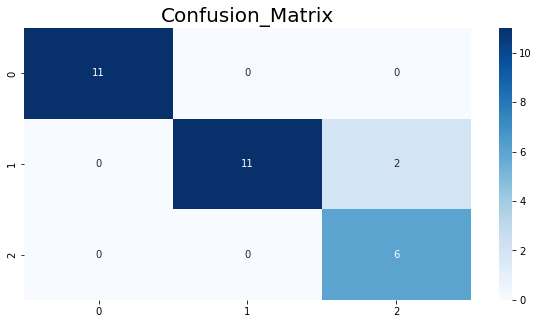

In [42]:
plt.figure(figsize=(10,5))
plt.title('Confusion_Matrix',fontsize=20)
sns.heatmap(cf,annot=True,fmt='g',cmap='Blues')

In [43]:
print(classification_report(y_test,pipe_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.85      0.92        13
           2       0.75      1.00      0.86         6

    accuracy                           0.93        30
   macro avg       0.92      0.95      0.92        30
weighted avg       0.95      0.93      0.94        30

